In [90]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set(style="ticks", color_codes=True)

In [91]:
def plot_results_2(path_to_directory):
    final_true_results = None
    final_true_results_isNone = True
    final_predicted_results = None
    final_predicted_results_isNone = True
    pmRanges = ['00-09', '10-19', '20-29', '30-39', '40-49', '50-59']
    filenames = os.listdir(path_to_directory)
    for current_pmRange_ in pmRanges:
        current_filenames = [f for f in filenames if re.match('.*' + current_pmRange_ + '.*', f)]
        if final_predicted_results_isNone:
            final_predicted_results = np.load(path_to_directory + "/" + current_filenames[0]).reshape(-1, 1)
            final_predicted_results_isNone = False
        else:
            final_predicted_results = np.concatenate((final_predicted_results, np.load(path_to_directory + "/" + current_filenames[0]).reshape(-1, 1)), axis=0)
        if final_true_results_isNone:
            final_true_results = np.load(path_to_directory + "/" + current_filenames[1]).reshape(-1, 1)
            final_true_results_isNone = False
        else:
            final_true_results = np.concatenate((final_true_results, np.load(path_to_directory + "/" + current_filenames[1]).reshape(-1, 1)), axis=0)
    
    results = np.concatenate((final_true_results.reshape(-1, 1), final_predicted_results.reshape(-1, 1)), axis=1)
    df_results = pd.DataFrame(results, columns=['True', 'Predicted'])  
    df_results['True'] = df_results['True'].astype(np.float64)
    df_results['Predicted'] = df_results['Predicted'].astype(np.float64)
    df_results = df_results[df_results['True'] != 0.0]
    return df_results

In [92]:
plot_results_2("results_for_final_paper/VGG_webcamId_1066_nonTimeSplit_trainedOnUniformDistributionPerBatch")

,True,Predicted
1,4.0,2.797690
2,7.0,14.282655
3,3.0,9.578826
4,4.0,12.453151
5,4.0,16.824781
6,1.0,11.785419
7,6.0,10.477317
8,4.0,9.680965
9,6.0,11.444557
10,6.0,7.007142


In [17]:
def plot_results(path_to_predicted_output, path_to_true_output):
    predicted_results = np.load(path_to_predicted_output)
    predicted_results = predicted_results[:len(predicted_results)-66]
    print(len(predicted_results))
    true_results = np.load(path_to_true_output)
    true_results = true_results[:len(true_results)-66] 
    print(len(true_results))
    results = np.concatenate((true_results.reshape(-1, 1), predicted_results.reshape(-1, 1)), axis=1)
    df_results = pd.DataFrame(results, columns=['True', 'Predicted'])  
    df_results['True'] = df_results['True'].astype(np.float64)
    df_results['Predicted'] = df_results['Predicted'].astype(np.float64)
    import sklearn
    from sklearn import metrics
    print(sklearn.metrics.r2_score(true_results, predicted_results))
    return df_results
    

In [8]:
df_results_for_vgg_dev_1066 = plot_results("results_for_final_presentation/VGG_DEV_1066_output_predicted_values.npy", "results_for_final_presentation/VGG_DEV_1066_output_true_values.npy")

13200
13200
0.8598219540549304


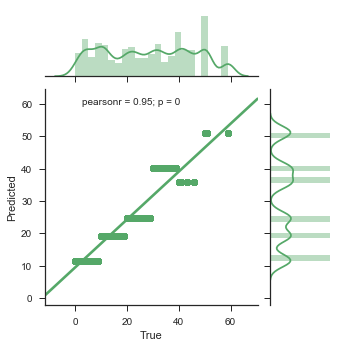

In [9]:
vgg_dev_1066_plot = sns.jointplot("True", "Predicted", data=df_results_for_vgg_dev_1066, kind="reg", ci = None, size=5, ratio=3, color="g")

In [10]:
df_results_for_vgg_train_1066 = plot_results("results_for_final_presentation/VGG_TRAIN_1066_output_predicted_values.npy", "results_for_final_presentation/VGG_TRAIN_1066_output_true_values.npy")

13200
13200
0.9212921200808468


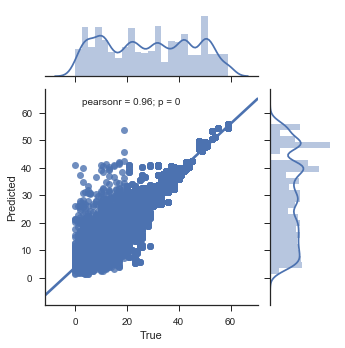

In [11]:
vgg_train_1066_plot = sns.jointplot("True", "Predicted", data=df_results_for_vgg_train_1066, kind="reg", ci = None, size=5, ratio=3, color="b")

In [12]:
df_results_for_dehaze_dev_1066 = plot_results("results_for_final_presentation/DehazeNet_DEV_1066_output_predicted_values.npy", "results_for_final_presentation/DehazeNet_DEV_1066_output_true_values.npy")

13200
13200
0.4070923138353504


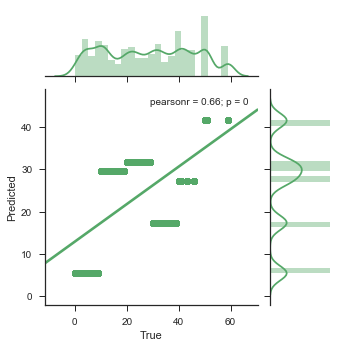

In [13]:
dehaze_dev_1066_plot = sns.jointplot("True", "Predicted", data=df_results_for_dehaze_dev_1066, kind="reg", ci = None, size=5, ratio=3, color="g")

In [14]:
df_results_for_dehaze_train_1066 = plot_results("results_for_final_presentation/DehazeNet_TRAIN_1066_output_predicted_values.npy", "results_for_final_presentation/DehazeNet_TRAIN_1066_output_true_values.npy")

13200
13200
0.5405167108777301


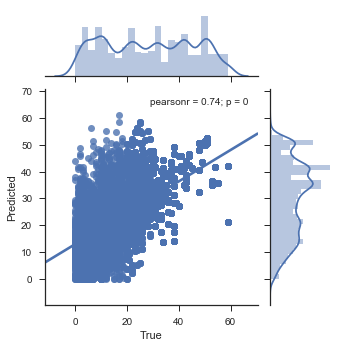

In [15]:
dehaze_train_1066_plot = sns.jointplot("True", "Predicted", data=df_results_for_dehaze_train_1066, kind="reg", ci = None, size=5, ratio=3, color="b")

In [16]:
df_results_for_vgg_dev_17603 = plot_results("results_for_final_presentation/VGG_DEV_17603_output_predicted_values.npy", "results_for_final_presentation/VGG_DEV_17603_output_true_values.npy")

13200
13200
0.9014951286401061


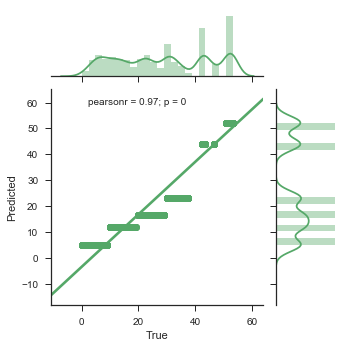

In [17]:
vgg_dev_17603_plot = sns.jointplot("True", "Predicted", data=df_results_for_vgg_dev_17603, kind="reg", ci = None, size=5, ratio=3, color="g")

In [18]:
df_results_for_vgg_train_17603 = plot_results("results_for_final_presentation/VGG_TRAIN_17603_output_predicted_values.npy", "results_for_final_presentation/VGG_TRAIN_17603_output_true_values.npy")

13200
13200
0.8515402609497458


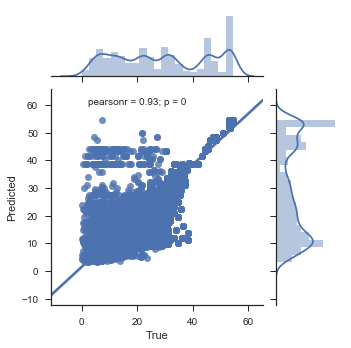

In [19]:
vgg_train_17603_plot = sns.jointplot("True", "Predicted", data=df_results_for_vgg_train_17603, kind="reg", ci = None, size=5, ratio=3, color="b")

In [20]:
df_results_for_dehaze_dev_17603 = plot_results("results_for_final_presentation/DehazeNet_DEV_17603_output_predicted_values.npy", "results_for_final_presentation/DehazeNet_DEV_17603_output_true_values.npy")

13200
13200
0.47643504787667823


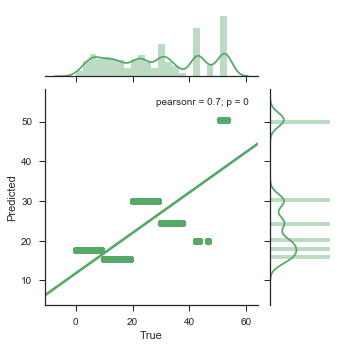

In [21]:
dehaze_dev_17603_plot = sns.jointplot("True", "Predicted", data=df_results_for_dehaze_dev_17603, kind="reg", ci = None, size=5, ratio=3, color="g")

In [22]:
df_results_for_dehaze_train_17603 = plot_results("results_for_final_presentation/DehazeNet_TRAIN_17603_output_predicted_values.npy", "results_for_final_presentation/DehazeNet_TRAIN_17603_output_true_values.npy")

13200
13200
0.6315023862270474


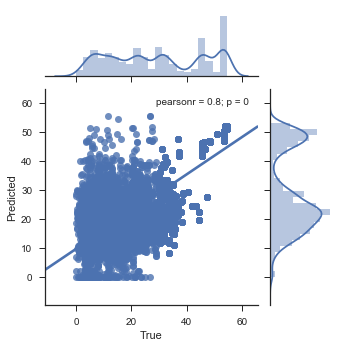

In [23]:
dehaze_train_17603_plot = sns.jointplot("True", "Predicted", data=df_results_for_dehaze_train_17603, kind="reg", ci = None, size=5, ratio=3, color="b")

In [24]:
df_results_for_vgg_dev_21587 = plot_results("results_for_final_presentation/VGG_DEV_21587_output_predicted_values.npy", "results_for_final_presentation/VGG_DEV_21587_output_true_values.npy")

6600
6600
0.7573056131515108


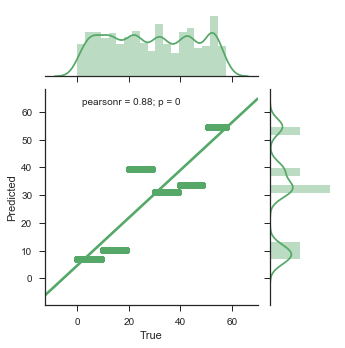

In [25]:
vgg_dev_21587_plot = sns.jointplot("True", "Predicted", data=df_results_for_vgg_dev_21587, kind="reg", ci = None, size=5, ratio=3, color="g")

In [26]:
df_results_for_vgg_train_21587 = plot_results("results_for_final_presentation/VGG_TRAIN_21587_output_predicted_values.npy", "results_for_final_presentation/VGG_TRAIN_21587_output_true_values.npy")

6600
6600
0.7918041994796523


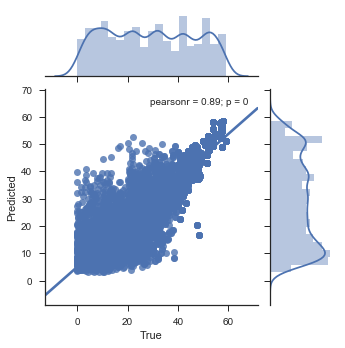

In [27]:
vgg_train_21587_plot = sns.jointplot("True", "Predicted", data=df_results_for_vgg_train_21587, kind="reg", ci = None, size=5, ratio=3, color="b")

In [ ]:
#df_results_for_dehaze_dev_21587 = plot_results("results_for_final_presentation/DehazeNet_DEV_21587_output_predicted_values.npy", "results_for_final_presentation/DehazeNet_DEV_21587_output_true_values.npy")

In [ ]:
#dehaze_dev_21587_plot = sns.jointplot("True", "Predicted", data=df_results_for_dehaze_dev_21587, kind="reg", ci = None, size=5, ratio=3, color="g")

In [ ]:
#df_results_for_dehaze_train_21587 = plot_results("results_for_final_presentation/DehazeNet_TRAIN_21587_output_predicted_values.npy", "results_for_final_presentation/DehazeNet_TRAIN_21587_output_true_values.npy")

In [ ]:
#dehaze_train_21587_plot = sns.jointplot("True", "Predicted", data=df_results_for_dehaze_train_17603, kind="reg", ci = None, size=5, ratio=3, color="b")

In [3]:
#df_results_for_resnet_dev_17603 = plot_results("results_for_final_presentation/RESNET_DEV_1066_output_predicted_values.npy", "results_for_final_presentation/VGG_DEV_17603_output_true_values.npy")

In [4]:
#vgg_dev_17603_plot = sns.jointplot("True", "Predicted", data=df_results_for_vgg_dev_17603, kind="reg", ci = None, size=5, ratio=3, color="g")

In [5]:
#df_results_for_vgg_train_17603 = plot_results("results_for_final_presentation/VGG_TRAIN_17603_output_predicted_values.npy", "results_for_final_presentation/VGG_TRAIN_17603_output_true_values.npy")

In [6]:
#vgg_train_17603_plot = sns.jointplot("True", "Predicted", data=df_results_for_vgg_train_17603, kind="reg", ci = None, size=5, ratio=3, color="b")

In [3]:
#df_results_for_vgg_dev_21587 = plot_results("results_for_final_presentation/VGG_DEV_21587_output_predicted_values.npy", "results_for_final_presentation/VGG_DEV_21587_output_true_values.npy")

In [4]:
#vgg_dev_21587_plot = sns.jointplot("True", "Predicted", data=df_results_for_vgg_dev_21587, kind="reg", ci = None, size=5, ratio=3, color="g")

In [5]:
#df_results_for_vgg_train_21587 = plot_results("results_for_final_presentation/VGG_TRAIN_21587_output_predicted_values.npy", "results_for_final_presentation/VGG_TRAIN_21587_output_true_values.npy")

In [6]:
#vgg_train_21587_plot = sns.jointplot("True", "Predicted", data=df_results_for_vgg_train_21587, kind="reg", ci = None, size=5, ratio=3, color="b")

In [93]:
df_results_for_vgg_train_1066_with_no_duplicates = plot_results_2("results_for_final_paper/VGG_TRAIN_webcamId_1066_nonTimeSplit_trainedOnUniformDistributionPerBatch")

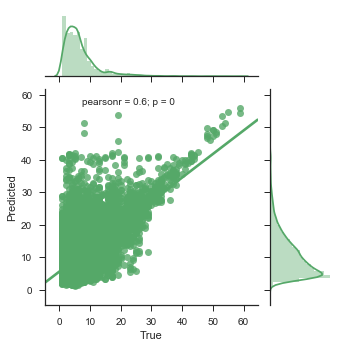

In [94]:
vgg_train_1066_plot_with_no_duplicates = sns.jointplot("True", "Predicted", data=df_results_for_vgg_train_1066_with_no_duplicates, kind="reg", ci = None, size=5, ratio=3, color="g")
